## Import and Read Dataset

In [1]:
import pandas as pd
import numpy as np

import re
import matplotlib.pyplot as plt

In [2]:
# Dataset Mentah

dataset_raw_df = pd.read_csv ("..\Dataset\Indonesian News Dataset.csv")
dataset_raw_df.head()

,id,source,title,image,url,content,date,embedding,created_at,updated_at,summary
0,83,tempo,"Depo Plumpang Terbakar, Anggota DPR Minta Pert...",https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698528/depo-pl...,"TEMPO.CO, Jakarta - Anggota Komisi VII DPR RI ...",2023-03-04 06:18:13+00,"[-0.01590039,-0.034130897,0.005732614,-0.01853...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Anggota Komisi VII DPR RI Rofik Hananto menyay...
1,84,tempo,Jokowi Perintahkan Wapres Ma'ruf Amin Tinjau L...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698522/jokowi-...,"TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...",2023-03-04 06:04:38+00,"[-0.017608976,-0.021786924,0.01547983,-0.00932...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Presiden Joko Widodo telah memerintahkan Wakil...
2,85,tempo,HNW Mendukung Jamaah Umroh First Travel Dapatk...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698527/hnw-men...,INFO NASIONAL - Wakil Ketua MPR RI Dr. H. M. H...,2023-03-04 06:18:04+00,"[0.00841488,-0.023665192,0.006762431,-0.013723...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Wakil Ketua MPR RI Dr. H. M. Hidayat Nur Wahid...
3,86,tempo,Tim Dokkes Polri Telah Terima 14 Kantong Jenaz...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698540/tim-dok...,"TEMPO.CO, Jakarta - Tim Kedokteran dan Kesehat...",2023-03-04 06:44:10+00,"[-0.012671886,-0.0039057182,0.019575326,-0.016...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Tim Kedokteran dan Kesehatan (Dokkes) Polri te...
4,87,tempo,Bamsoet Ajak Komunitas Otomotif Kembangkan Per...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698536/bamsoet...,INFO NASIONAL - Ketua MPR RI sekaligus Ketua U...,2023-03-04 06:38:57+00,"[-0.015486176,-0.0125719,-0.0122843925,-0.0343...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Ketua MPR RI Bambang Soesatyo telah diangkat s...


## Preprocessing Dataset

In [3]:
# Memilih kolom yang digunakan pada dataset (cuma butuh text sama summary)

dataset_df = dataset_raw_df[["content", "summary"]]
dataset_df

,content,summary
0,"TEMPO.CO, Jakarta - Anggota Komisi VII DPR RI ...",Anggota Komisi VII DPR RI Rofik Hananto menyay...
1,"TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...",Presiden Joko Widodo telah memerintahkan Wakil...
2,INFO NASIONAL - Wakil Ketua MPR RI Dr. H. M. H...,Wakil Ketua MPR RI Dr. H. M. Hidayat Nur Wahid...
3,"TEMPO.CO, Jakarta - Tim Kedokteran dan Kesehat...",Tim Kedokteran dan Kesehatan (Dokkes) Polri te...
4,INFO NASIONAL - Ketua MPR RI sekaligus Ketua U...,Ketua MPR RI Bambang Soesatyo telah diangkat s...
...,...,...
32730,menjadi salah satu lubang terdalam dan tergela...,Peneliti berhasil mengungkap sedikit demi sedi...
32731,Seorang guru SD di Banyuwangi ditangkap oleh p...,Seorang guru SD di Banyuwangi ditangkap polisi...
32732,"Pelatih , Aji Santoso, salut dengan sambutan s...","Pelatih Persebaya, Aji Santoso, menyampaikan s..."
32733,Suasana haru terjadi usai sidang terdakwa Suge...,"Sugeng Guruh Gautama Legiman, terdakwa kasus k..."


In [4]:
# Bersih-bersih kalau ada whitespace atau ada simbol simbol yang aneh

import re

def text_strip(column):
    for row in column:
        
        # Jangan ubah urutan regex

        # Remove escape characters
        row = re.sub(r"(\\t|\\r|\\n|\t|\r|\n)", ' ', str(row)).lower()
        # Remove consecutive occurrences of special characters
        row = re.sub(r"(__+|-+|~+|\++|\.\.+)", ' ', row)
        # Remove various special characters
        row = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', row)
        # Remove 'mailto:'
        row = re.sub(r"(mailto:)", ' ', row)
        # Remove '\x9*'
        row = re.sub(r"(\\x9\d)", ' ', row)
        # Replace 'INC' followed by numbers with 'INC_NUM'
        row = re.sub(r"([iI][nN][cC]\d+)", 'INC_NUM', row)
        # Replace 'CM' or 'CHG' followed by numbers with 'CM_NUM'
        row = re.sub(r"([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', row)
        # Remove full stop, dash, and colon at the end of words
        row = re.sub(r"(\.\s+|\-\s+|\:\s+)", ' ', row)
        
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        
        row = re.sub(r"(pilihan\seditor).*", '', row)
        row = re.sub(r"tempo.co|info\snasional|suara.com", '', str(row)).lower()

        row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single characters hanging between 2 spaces

        yield row

In [5]:
# Sample input
input_text = "TEMPO.CO, Jakarta - Presiden Joko Widodo atau Jokowi memerintahkan Wakil Presiden Ma'ruf Amin untuk meninjau langsung lokasi kebakaran depo Pertamina di Plumpang, Jakarta Utara. Kebakaran besar di lokasi tersebut terjadi pada Jumat malam, 3 Maret 2023, dan mengakibatkan belasan warga di sekitar depo tewas.Presiden tidak ke Plumpang hari ini. Tapi, Presiden sudah berkoordinasi dengan Wapres yang akan meninjau hari ini, ujar Deputi Bidang Protokol, Pers, dan Media Sekretariat Presiden Bey Machmudin saat dihubungi, Sabtu, 4 Februari 2023.Selain memerintahkan Ma'ruf Amin, Bey menyebut Jokowi juga telah memberikan arahan kepada Kapolri Jenderal Listyo Sigit Prabowo, Menteri BUMN Erick Thohir, dan Penjabat Gubernur DKI Jakarta Heru Budi Hartono soal kunjungan ke lokasi.Intinya Presiden minta untuk mengutamakan evakuasi korban dan penanganan warga terdampak, kata Bey.Kronologi KebakaranDepo Pertamina di Plumpang, Jakarta Utara, terbakar pada Jumat malam, 3 Maret 2023, pukul 20.20 WIB. Kepala Dinas Penanggulangan Kebakaran dan Penyelamatan DKI Jakarta, Satriadi Gunawan, mengatakan, objek kebakaran tersebut adalah pipa bensin.Sementara itu, berdasarkan kesaksian warga, tercium aroma bensin yang menyengat sebelum kebakaran terjadi. Dilansir dari Antara, salah seorang warga, Pandi mengatakan, ada bau bensin yang santer sebelum kejadian saat ia melintas di daerah tersebut.Hingga kini belum diketahui penyebab kebakaran hebat tersebut. Namun, pihak Pertamina mengaku masih menginvestigasi penyebab insiden itu.Penyebab kejadian masih dalam proses investigasi, kata Area Manager Communication, Relation & CSR Pertamina Patra Niaga Regional Jawa Bagian Barat Eko Kristiawan.Eko juga menambahkan pihaknya saat ini fokus pada penanganan kebakaran pipa penerimaan BBM di Integrated Terminal BBM Jakarta, Plumpang.Setidaknya 17 orang dilaporkan meninggal dunia akibat insiden ini. Sementara 50 orang mengalami luka-luka dengan berbagai tingkat keparahan.Api yang menyambar hingga ke dua kawasan rumah warga (RW) ini juga mengakibatkan ratusan orang terpaksa mengungsi. Badan Penanggulangan Bencana Daerah (BPBD) DKI Jakarta menyatakan warga yang mengungsi akibat kebakaran mencapai 579 jiwa. Mereka tersebar di enam titik pengungsian. Pengungsi info sementara 579 jiwa, demikian keterangan BPBD DKI Jakarta, Sabtu, 4 Maret 2024.Pilihan Editor:Profil Depo Pertamina Plumpang, Pemasok 20 Persen Pasokan BBM di Seluruh Indonesia"

# Apply the text_strip function to the input text
cleaned_text = next(text_strip([input_text]))

# Print the cleaned text
print(cleaned_text)

 jakarta presiden joko widodo atau jokowi memerintahkan wakil presiden ma ruf amin untuk meninjau langsung lokasi kebakaran depo pertamina di plumpang jakarta utara kebakaran besar di lokasi tersebut terjadi pada jumat malam maret 2023 dan mengakibatkan belasan warga di sekitar depo tewas.presiden tidak ke plumpang hari ini tapi presiden sudah berkoordinasi dengan wapres yang akan meninjau hari ini ujar deputi bidang protokol pers dan media sekretariat presiden bey machmudin saat dihubungi sabtu februari 2023.selain memerintahkan ma ruf amin bey menyebut jokowi juga telah memberikan arahan kepada kapolri jenderal listyo sigit prabowo menteri bumn erick thohir dan penjabat gubernur dki jakarta heru budi hartono soal kunjungan ke lokasi.intinya presiden minta untuk mengutamakan evakuasi korban dan penanganan warga terdampak kata bey.kronologi kebakarandepo pertamina di plumpang jakarta utara terbakar pada jumat malam maret 2023 pukul 20.20 wib kepala dinas penanggulangan kebakaran dan pe

In [6]:
# Di apply bersih-bersih yang tadi

brief_cleaning1 = text_strip(dataset_df['content'])
brief_cleaning2 = text_strip(dataset_df['summary'])

In [7]:
# Pake library spacy buat batch (ini kepake nanti sih pas pake dataset full, datanya kan cuma 1000, batch sizenya 5000 jadi rada gaguna sekarang)

import spacy
from spacy.lang.id import Indonesian
from time import time

nlp = Indonesian()  # Load Indonesian spaCy model

t = time()

In [8]:
text = [str(doc) for doc in nlp.pipe(brief_cleaning1, batch_size=5000, n_process=-1)]
print('Time to clean up text: {} mins'.format(round((time() - t) / 60, 2)))

print('Example Text : ', text[25])

Time to clean up text: 1.23 mins
Example Text :   menteri pertanian syahrul yasin limpo meminta organisasi rumah petani nelayan nusantara rpnn untuk menggunakan anggaran kredit usaha rakyat kur sebagai dukungan bersama dalam meningkatkan produktivitas saya berharap rpnn mampu menggunakan kur sebagai dukungan bersama terhadap jalannya produksi dan usaha tani kami tidak ada bantuan karena yang ada hanya gagasan kata syahrul saat membuka rapat kerja nasional rpnn di komplek pusat pelatihan manajemen kepemimpinan ppmk ciawi bogor jawa barat sabtu maret 2023.syahrul menjelaskan kredit usaha rakyat adalah program yang dicanangkan presiden jokowi dalam membantu petani mendapatkan akses perkreditan program ini menjangkau semua petani dari berbagai kalangan di seluruh indonesia.terutama kalangan petani milenial yang memiliki kemampuan dalam mengunakan teknologi digitalisasi saya katakan salah satu fasilitas yang diberikan bapak presiden itu adalah kredit usaha rakyat tentu aksesnya dengan penga

In [9]:
summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(brief_cleaning2, batch_size=5000, n_process=-1)]
print('Time to clean up summary: {} mins'.format(round((time() - t) / 60, 2)))

print('Example Summary : ', summary[25])

Time to clean up summary: 2.02 mins
Example Summary :  _START_ menteri pertanian syahrul yasin limpo meminta organisasi rumah petani nelayan nusantara rpnn untuk menggunakan anggaran kredit usaha rakyat kur sebagai dukungan bersama dalam meningkatkan produktivitas kur adalah program yang dicanangkan presiden jokowi untuk membantu petani mendapatkan akses perkreditan ketua rpnn slamet mengatakan organisasinya siap mendukung kesuksesan program pemerintah dan membela kepentingan petani. _END_


In [21]:
dataset_df.loc[:, 'cleaned_text'] = pd.Series(text)
dataset_df.loc[:, 'cleaned_summary'] = pd.Series(summary)

In [11]:
# Menghitung panjang text & summary

text_count = []
summary_count = []

for sent in dataset_df['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in dataset_df['cleaned_summary']:
    summary_count.append(len(sent.split()))

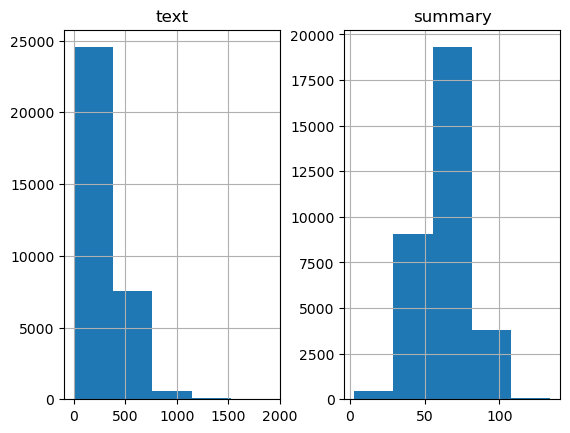

In [12]:
#Dijadiin graph biar keliatan rata-rata text itu panjangnya berapa

graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count
graph_df.hist(bins = 5)
plt.show()

In [13]:
# Dari graph kelihatan kalo mayoritas summary tuh ada di rentan 100 kata
# Check how much % of summary have 0-100 words

cnt=0
for i in dataset_df['cleaned_summary']:
    if(len(i.split())<=100):
        cnt=cnt+1
print("% of Text that have 0 - 100 word = ", (round(cnt/len(dataset_df['cleaned_summary']) * 100, 2)), "%")

% of Text that have 0 - 100 word =  99.51 %


In [14]:
# Dari graph kelihatan kalo mayoritas text tuh ada di rentan 900 kata
# Check how much % of text have 0-900 words

cnt=0
for i in dataset_df['cleaned_text']:
    if(len(i.split())<=900):
        cnt=cnt+1
print("% of Text that have 0 - 900 word = ", (round(cnt/len(dataset_df['cleaned_text']) * 100, 2)), "%")

% of Text that have 0 - 900 word =  99.02 %


In [15]:
# Model to summarize the text between 0-100 words for Summary and 0-900 words for Text
# Diset max nya untuk buang outlier

max_text_len=900
max_summary_len=100

In [16]:
# Select the Summaries and Text between max len defined above

cleaned_text =np.array(dataset_df['cleaned_text'])
cleaned_summary=np.array(dataset_df['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

In [17]:
post_pre

,text,summary
0,jakarta anggota komisi vii dpr ri rofik hanan...,_START_ anggota komisi vii dpr ri rofik hanant...
1,jakarta presiden joko widodo atau jokowi meme...,_START_ presiden joko widodo telah memerintahk...
2,wakil ketua mpr ri dr hidayat nur wahid ma at...,_START_ wakil ketua mpr ri dr hidayat nur wahi...
3,jakarta tim kedokteran dan kesehatan dokkes p...,_START_ tim kedokteran dan kesehatan dokkes po...
4,ketua mpr ri sekaligus ketua umum ikatan moto...,_START_ ketua mpr ri bambang soesatyo telah di...
...,...,...
32258,menjadi salah satu lubang terdalam dan tergela...,_START_ peneliti berhasil mengungkap sedikit d...
32259,seorang guru sd di banyuwangi ditangkap oleh p...,_START_ seorang guru sd di banyuwangi ditangka...
32260,pelatih aji santoso salut dengan sambutan saat...,_START_ pelatih persebaya aji santoso menyampa...
32261,suasana haru terjadi usai sidang terdakwa suge...,_START_ sugeng guruh gautama legiman terdakwa ...


In [18]:
post_pre.to_csv ('..\Dataset\Indonesian News Dataset Preprocessed.csv', index=False)